# Data Preprocessing and Statistical Analysis

### Objective: 
Apply data preprocessing techniques and implement statistical functions from scratch. The goal is to understand data handling, data cleaning, and feature engineering.

In [184]:
# Install the required packages for the task
# pip install pandas 
# pip install numpy
# pip install matplotlib

Loading the dataset from the local for the task

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(filepath):
    data = pd.read_csv('./IIS_Dataset_A1.csv')
    print(data.head())
    return data

## Task 1: Handle Missing Values

Identify missing values in the dataset and report their percentages.

In [186]:
# calculating percentage of missing values column-wise 
def handle_missing_values(data):
    miss_val_per = data.isnull().mean() * 100
    print("\n\nBelow is the missing value percentage\n\n")
    print(miss_val_per)
    data.fillna(data.median(), inplace=True)
    print("\n\nBelow is the value after replacing na value with feauture's median\n\n")
    print(data)
    return data
    
    

Impute the missing values with median 

## Task 2: Detect and Handle Outliers

Using the Interquartile Range (IQR) method to detect outliers in the 'yield' column.

In [187]:
 # Calculating the IQR 
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # print("\n\nBelow is the value of Upper_Bound and Lower_Bound\n\n")
    # print("upper_bound : ",upper_bound)
    # print("lower_bound : ",lower_bound)
    
    return lower_bound,upper_bound  

In [188]:
# Handle Outliers
def handle_outliers(data, column):
    # Before Imputation Boxplot
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.boxplot(data['yield'])
    plt.plot([1] * len(data['yield']), data['yield'], 'o', color='blue', alpha=0.5, markersize=1.5) 
    plt.title('Before Imputation Boxplot')
    
    lower_bound,upper_bound=detect_outliers_iqr(data, column)
    # Replacing the outliers outside the range with lower and upper bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    # After Imputation Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(data['yield'])
    plt.plot([1] * len(data['yield']), data['yield'], 'o', color='blue', alpha=0.5, markersize=1.5) 
    plt.title('After Imputation Boxplot')
    
    return data
    
    

## Task 3: Visualize Data Distributions

Plot a boxplot to visualize outliers before and after imputation.

In [190]:
def plot_histogram(data,column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 1, 1)
    plt.hist(data[column],bins=30)
    plt.title('Histogram distribution for given feature')

## Task 4: Implement Statistical Functions from Scratch

Defining functions for variance, covariance, and correlation.

In [191]:
def manual_variance(column):
    mean = sum(column) / len(column)
    return sum((x - mean) ** 2 for x in column) / len(column)

def manual_covariance(x, y):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    return sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / len(x)

def manual_correlation(x, y):
    return manual_covariance(x, y) / (manual_variance(x) ** 0.5 * manual_variance(y) ** 0.5)

def manual_correlation_matrix(data):
    correlation_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i == j:
                correlation_matrix.iloc[i, j] = 1.0
            else:
                x = data.iloc[:, i]
                y = data.iloc[:, j]
                correlation_matrix.iloc[i, j] = manual_correlation(x, y)
    
    return correlation_matrix

## Task 5: Feature Selection

Computing the correlation matrix and dropping highly correlated features.

In [192]:
def drop_highly_correlated_features(data, threshold=0.9):
    drop_col = set()
    corr_matrix = manual_correlation_matrix(data)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                drop_col.add(colname)
    data.drop(columns=drop_col, inplace=True)
    print('\n\nDropped features : ', drop_col)
    return data

      id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0  12000       25.0      0.50     0.38     0.50   0.50              94.6   
1  12001       12.5      0.25     0.38     0.38   0.75              94.6   
2  12002       12.5      0.25     0.38     0.50   0.50              94.6   
3  12003       25.0      0.50     0.38     0.63   0.50              69.7   
4  12004       12.5      0.25     0.25     0.38   0.50              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              57.2                  79.0              68.2              33.0   
1              57.2                  79.0              68.2              33.0   
2              57.2                  79.0              68.2              33.0   
3              42.1                  58.2              50.2              24.3   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays

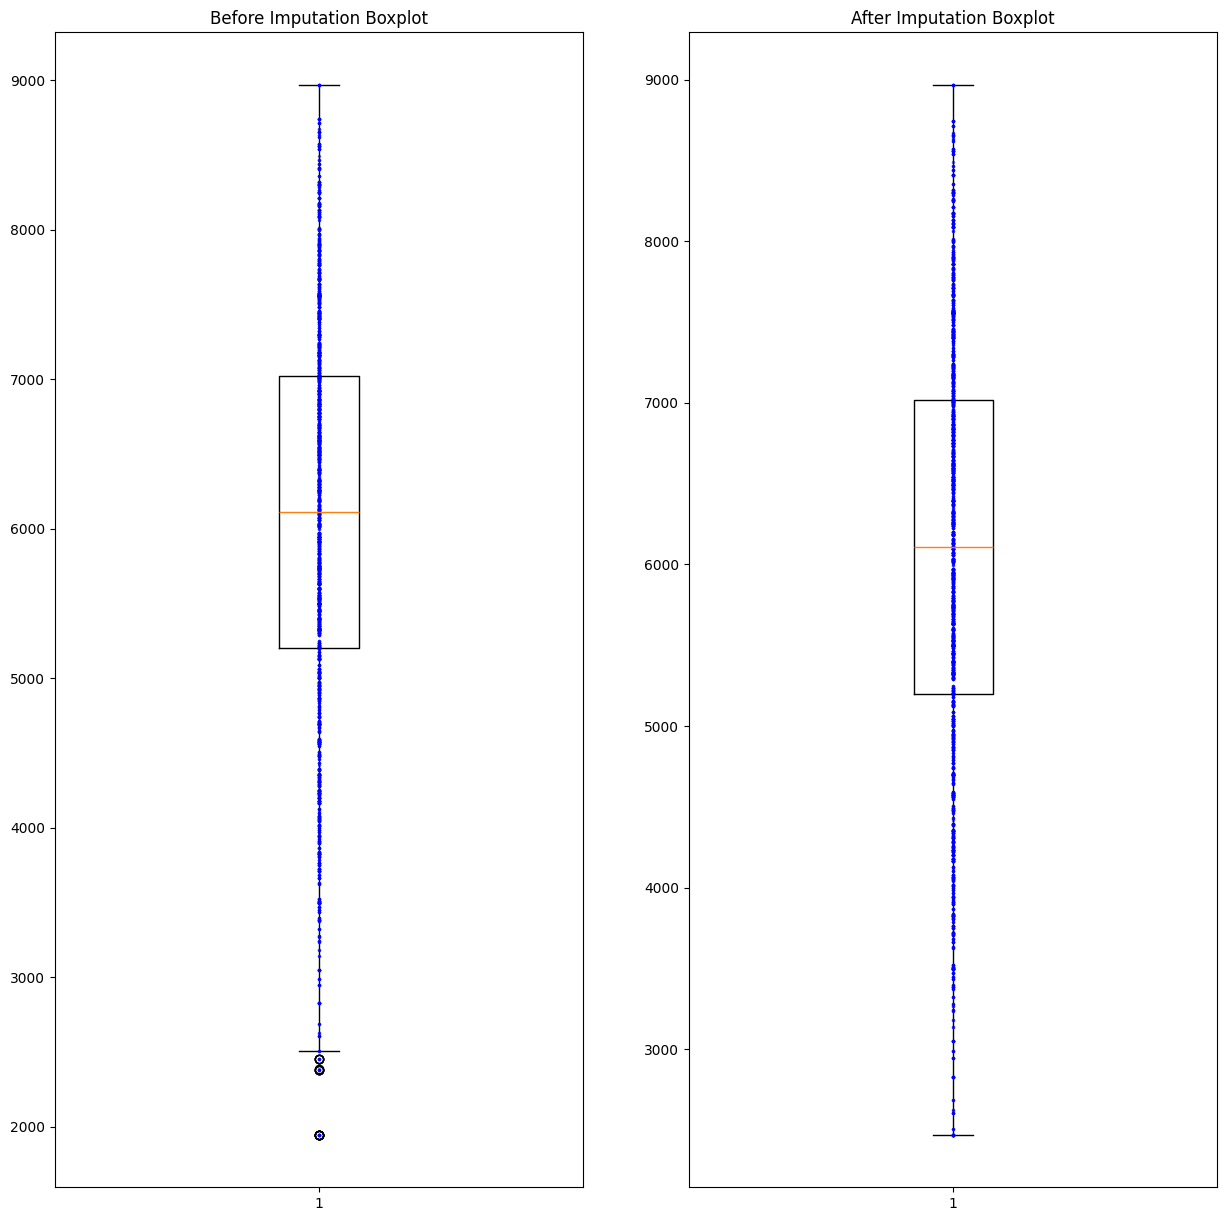

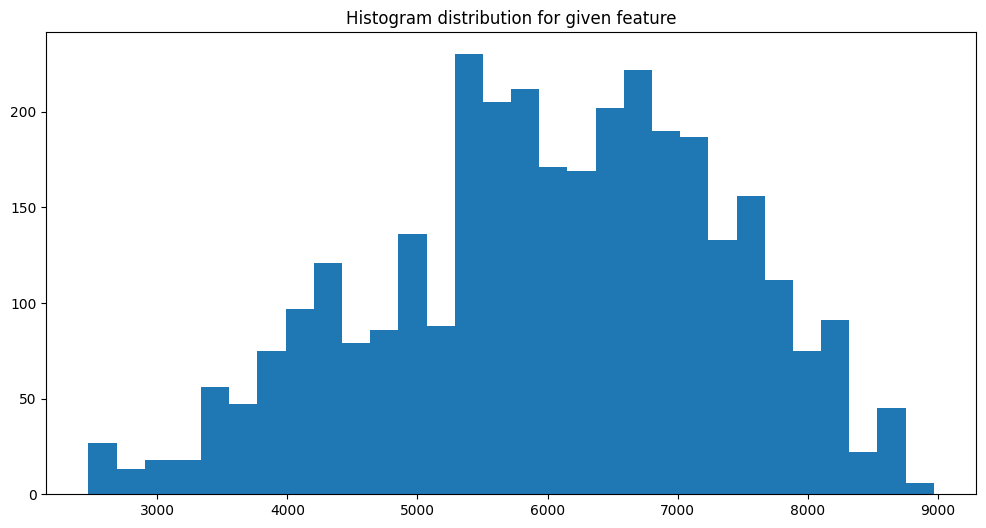

In [194]:
# Main Execution
if __name__ == "__main__":
    filepath = "./IIS_Dataset_A1.csv"
    df = load_data(filepath)
    df = handle_missing_values(df)
    df = handle_outliers(df, 'yield')
    plot_histogram(df, 'yield')
    df = drop_highly_correlated_features(df)
    print("\n\nFinal Cleaned DataFrame : ")
    print(df.head())